In [1]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [2]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [10]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

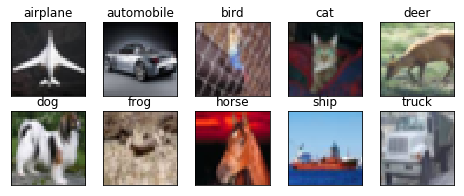

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [8]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [11]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(3, 32, 32..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 32, 32)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 30, 30)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 48, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 15, 15)        41568     
__________

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info = model.fit(train_features, train_labels, 
                       batch_size=128, nb_epoch=200, 
                       validation_data = (test_features, test_labels))
end = time.time()

Instructions for updating:
Use tf.cast instead.


/home/rhea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 130s 3ms/step - loss: 1.8533 - acc: 0.2832 - val_loss: 1.4649 - val_acc: 0.4538
Epoch 2/200
50000/50000 [==============================] - 128s 3ms/step - loss: 1.3344 - acc: 0.5155 - val_loss: 1.1170 - val_acc: 0.5939
Epoch 3/200
50000/50000 [==============================] - 127s 3ms/step - loss: 1.0957 - acc: 0.6111 - val_loss: 0.9541 - val_acc: 0.6612
Epoch 4/200
50000/50000 [==============================] - 127s 3ms/step - loss: 0.9549 - acc: 0.6667 - val_loss: 0.8457 - val_acc: 0.7034
Epoch 5/200
50000/50000 [==============================] - 135s 3ms/step - loss: 0.8498 - acc: 0.7081 - val_loss: 0.7674 - val_acc: 0.7326
Epoch 6/200
50000/50000 [==============================] - 128s 3ms/step - loss: 0.7846 - acc: 0.7307 - val_loss: 0.7631 - val_acc: 0.7425
Epoch 7/200
50000/50000 [==============================] - 131s 3ms/step - loss: 0.7300 - acc: 0.7491 - val_loss: 0.

50000/50000 [==============================] - 125s 2ms/step - loss: 0.2857 - acc: 0.9051 - val_loss: 0.6000 - val_acc: 0.8221
Epoch 60/200
50000/50000 [==============================] - 125s 3ms/step - loss: 0.2797 - acc: 0.9086 - val_loss: 0.5709 - val_acc: 0.8361
Epoch 61/200
50000/50000 [==============================] - 126s 3ms/step - loss: 0.2809 - acc: 0.9083 - val_loss: 0.5980 - val_acc: 0.8336
Epoch 62/200
50000/50000 [==============================] - 125s 3ms/step - loss: 0.2726 - acc: 0.9119 - val_loss: 0.6025 - val_acc: 0.8289
Epoch 63/200
50000/50000 [==============================] - 125s 3ms/step - loss: 0.2707 - acc: 0.9110 - val_loss: 0.6103 - val_acc: 0.8341
Epoch 64/200
50000/50000 [==============================] - 125s 3ms/step - loss: 0.2726 - acc: 0.9113 - val_loss: 0.6155 - val_acc: 0.8325
Epoch 65/200
50000/50000 [==============================] - 125s 3ms/step - loss: 0.2741 - acc: 0.9121 - val_loss: 0.6451 - val_acc: 0.8265
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 121s 2ms/step - loss: 0.2402 - acc: 0.9274 - val_loss: 0.6508 - val_acc: 0.8302
Epoch 118/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2341 - acc: 0.9293 - val_loss: 0.6485 - val_acc: 0.8335
Epoch 119/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2388 - acc: 0.9279 - val_loss: 0.6317 - val_acc: 0.8339
Epoch 120/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2485 - acc: 0.9247 - val_loss: 0.6375 - val_acc: 0.8313
Epoch 121/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2389 - acc: 0.9270 - val_loss: 0.6505 - val_acc: 0.8351
Epoch 122/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2331 - acc: 0.9297 - val_loss: 0.6950 - val_acc: 0.8344
Epoch 123/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2316 - acc: 0.9313 - val_loss: 0.6349 - val_acc: 0.8363
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 121s 2ms/step - loss: 0.2182 - acc: 0.9390 - val_loss: 0.7160 - val_acc: 0.8350
Epoch 176/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2268 - acc: 0.9349 - val_loss: 0.7008 - val_acc: 0.8284
Epoch 177/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2290 - acc: 0.9347 - val_loss: 0.6897 - val_acc: 0.8331
Epoch 178/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2199 - acc: 0.9368 - val_loss: 0.7057 - val_acc: 0.8369
Epoch 179/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2304 - acc: 0.9345 - val_loss: 0.6927 - val_acc: 0.8369
Epoch 180/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2322 - acc: 0.9351 - val_loss: 0.6935 - val_acc: 0.8395
Epoch 181/200
50000/50000 [==============================] - 121s 2ms/step - loss: 0.2312 - acc: 0.9353 - val_loss: 0.6885 - val_acc: 0.8348
Epoch 182/200
50000/50000 [

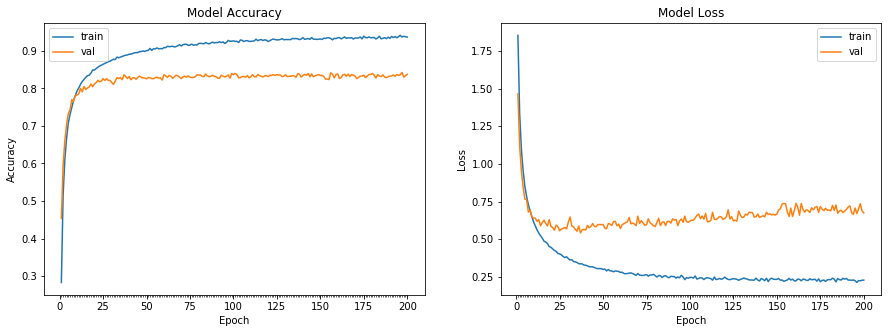

Model took 24810.68 seconds to train
Accuracy on test data is: 83.73


In [13]:
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))